# New Physics Searches at the Large Hadron Collider - Data Analysis

The steps needed to make your comparison of Standard Model predictions to **simulated** data for Higgs boson production are described in this notebook.

The data we examine are for an experimental analysis for the process $pp\rightarrow Hjj$ where $j$ represents a jet of hadrons. We aim to produce a distribution examining the mass of the two combined jets:

$$\frac{\mathrm{d}\sigma}{\mathrm{d}m_{jj}},$$

which is measured in units of $\mathrm{pb/GeV}$. This will plotted in bins of $m_{jj}$, measured in $\mathrm{GeV}$.

In this notebook you will plot the Standard Model background against the experimental data to examine whether we can confidently say the data indicates the presence of new physics.

For further information on the background and project brief please refer to the project [webpage](https://ippp.dur.ac.uk/~mkirk/nuffield/)

## Structuring data

Information can be stored in many form on computing systems, **data** needs to be **structured** in sensible and comprehensible ways that simplify interaction and interpreting.

A useful data structure in python (which exists in other programming languages) is the **array**, part of the `numpy` library.

Arrays are **containers** of variables which can be accessed individually, looped over, or altered by functions. Examples of how to use them are shown below - experiment with different values and functionalities!

In [1]:
## Example 1: Simple array manipulations
import numpy as np

# Construct arrays of numbers
array_1 = np.array([1,2,3,4])
array_2 = np.array([5,6,7,8])

print("Printing arrays")
print(array_1)
print(array_2)

# Operations for arrays
print("\nSimple array operations")
print("array_1 * array_2 = ", array_1 * array_2) # multiplies each element of array_1 by the corresponding element of array_2
print("array_1 + array_2 = ", array_1 + array_2) # adds each element of array_1 to the corresponding element of array_2
print("array_1 - array_2 = ", array_1 - array_2) # subtracts from each element of array_1 the corresponding element of array_2
print("array_1 / array_2 = ", array_1 / array_2) # divides each element of array_1 by the corresponding element of array_2

# Indexing for access to specific elements
# The first element of the array is '0', the second is '1', ...
print("\nIndexing arrays")
print("array_1[0] = ", array_1[0])
print("array_1[1] = ", array_1[1])
print("array_1[2] = ", array_1[2])
print("array_1[3] = ", array_1[3])

Printing arrays
[1 2 3 4]
[5 6 7 8]

Simple array operations
array_1 * array_2 =  [ 5 12 21 32]
array_1 + array_2 =  [ 6  8 10 12]
array_1 - array_2 =  [-4 -4 -4 -4]
array_1 / array_2 =  [0.2        0.33333333 0.42857143 0.5       ]

Indexing arrays
array_1[0] =  1
array_1[1] =  2
array_1[2] =  3
array_1[3] =  4


Functions can be used to modify components of arrays in many ways:

In [2]:
## Example 2: The following function
# transforms an array by multiplying
# each element by its index
import numpy as np

def transform_array(array):
    
    # enumerate gives access to index
    # and elements of a container
    for idx, num in enumerate(array):
        # inline multiplication multiplies
        # the element by the index
        array[idx] *= idx
    
    return array

test_array = np.array([1,2,3,4])
print("test array = ", test_array)
print("transformed array = ", transform_array(test_array))

test array =  [1 2 3 4]
transformed array =  [ 0  2  6 12]


Arrays can also be **multi-dimensional**!

In [3]:
## Example 2: Multi-dimensional arrays
import numpy as np

multi_array_1 = np.array([[1,2],[3,4]]) # This forms a 2x2 matrix!
multi_array_2 = np.array([[5,6],[7,8]])

# Multi-dimensional array operations:
print("Multi-dimensional array operations")
print("multi_array_1 = \n", multi_array_1)
print("\nmulti_array_2 = \n", multi_array_2)
print("\nmulti_array_1 + multi_array_2 = \n", multi_array_1 + multi_array_2)

# Indexing is more complicated:
print("\n---\n\nIndexing multi-dimensional arrays")
print("multi_array_1[0,0] = \n", multi_array_1[0,0])
print("\nmulti_array_1[0,1] = \n", multi_array_1[0,1])
print("\nmulti_array_1[1,0] = \n", multi_array_1[1,0])
print("\nmulti_array_1[1,1] = \n", multi_array_1[1,1])

# The 'shape' function tells you the dimensions of the array
print("\n---\n\nShape of multi_array_1 = ", np.shape(multi_array_1)) # 2x2 matrix
print("\nShape of multi_array_2 = ", np.shape(multi_array_2)) # 2x2 matrix


Multi-dimensional array operations
multi_array_1 = 
 [[1 2]
 [3 4]]

multi_array_2 = 
 [[5 6]
 [7 8]]

multi_array_1 + multi_array_2 = 
 [[ 6  8]
 [10 12]]

---

Indexing multi-dimensional arrays
multi_array_1[0,0] = 
 1

multi_array_1[0,1] = 
 2

multi_array_1[1,0] = 
 3

multi_array_1[1,1] = 
 4

---

Shape of multi_array_1 =  (2, 2)

Shape of multi_array_2 =  (2, 2)


___
#### Exercise 2a: Array transformations

You are tasked to work with data to produce a histogram. For each bin the data is provided in the following format:

$$[\mathrm{ \tt x\_low \quad x\_high \quad value \quad error\_minus \quad error\_plus}],$$

where $\mathrm{\tt x\_low, x\_high}$ are the edges of the bins in $x$, $\mathrm{\tt value}$ is the value of the histogram at that point, and $\mathrm{\tt error\_minus, error\_plus}$ are the error bars in $y$ (i.e. the total uncertainty on $y=\mathrm{\tt value}$ is $\mathrm{\tt error\_minus + error\_plus}$).

Produce a function that can add two histogram bins such that the **values** are added **linearly**, and the **errors** are combined **in quadrature** as discussed in the **introduction** notebook.

**NOTE**: To combine two different contributions to the same bin, the $\mathrm{\tt x\_low}$ and $\mathrm{\tt x\_high}$ entries **MUST** match.

In [4]:
# Define function to physically combine
# two entries for the same histogram
# bin in the stated format
import numpy as np

def combine_bin_contribs(bin_1, bin_2):

    # Check if x_low and x_high match
    if bin_1[0] != bin_2[0] or bin_1[1] != bin_2[1]:
        raise ValueError("Bin start and end values must match")

    new_x_low  = bin_1[0]
    new_x_high = bin_1[1]

    new_value = bin_1[2] + bin_2[2]
    
    new_error_minus = np.sqrt(bin_1[3]**2 + bin_2[3]**2)
    new_error_plus  = np.sqrt(bin_1[4]**2 + bin_2[4]**2)
    
    return np.array((new_x_low, new_x_high, new_value, new_error_minus, new_error_plus))

contrib_1 = np.array([5, 10, 20, 3, 3])
contrib_2 = np.array([5, 10, 10, 4, 4])
print(contrib_1)
print(contrib_2)
print(combine_bin_contribs(contrib_1, contrib_2))

[ 5 10 20  3  3]
[ 5 10 10  4  4]
[ 5. 10. 30.  5.  5.]


___

## Reading external files

Data from experiments and from theoretical predictions can be imported in a variety of formats, often from external files

We have included data in a format similar to the one from Exercise 2a, in the `.dat` files in the same folder as this notebook.

We can read these in python in a number of different ways:

In [5]:
## Example 3: Reading files
import numpy as np

# Native python open() function
# 'r' argument means 'read-only'
f = open("lhc-data.dat", "r")
print(f.read())
print(type(f.read()),"\n\n") # The native python 'open' function converts the file read to a string - not a useful format

# Try with numpy - which has some smarter functions!
example_histogram = np.genfromtxt("lhc-data.dat", dtype=float)
print(example_histogram)
print(type(example_histogram)) # The method has converted the data to a numpy array!
print(np.shape(example_histogram)) # The dimensions are right too - 20 bins, 5 columns for each bin!

0.000000e+00	5.000000e+01	6.477501e-06	8.500424e-08	8.500424e-08
5.000000e+01	1.000000e+02	2.198127e-05	3.679400e-07	3.679400e-07
1.000000e+02	1.500000e+02	7.112714e-06	1.320287e-07	1.320287e-07
1.500000e+02	2.000000e+02	7.348822e-06	1.373821e-07	1.373821e-07
2.000000e+02	2.500000e+02	4.699381e-06	1.578399e-07	1.578399e-07
2.500000e+02	3.000000e+02	6.141894e-06	3.886073e-07	3.886073e-07
3.000000e+02	3.500000e+02	4.109160e-06	4.575637e-07	4.575637e-07
3.500000e+02	4.000000e+02	3.209164e-06	9.512975e-08	9.512975e-08
4.000000e+02	4.500000e+02	3.287922e-06	9.084217e-08	9.084217e-08
4.500000e+02	5.000000e+02	2.588623e-06	1.335026e-07	1.335026e-07
5.000000e+02	5.500000e+02	2.629022e-06	1.139008e-07	1.139008e-07
5.500000e+02	6.000000e+02	2.524809e-06	8.615713e-08	8.615713e-08
6.000000e+02	6.500000e+02	2.962798e-06	1.618244e-07	1.618244e-07
6.500000e+02	7.000000e+02	1.694864e-06	9.617141e-08	9.617141e-08
7.000000e+02	7.500000e+02	2.198500e-06	1.947348e-07	1.947348e-07
7.500000e+02	8.000000e+02

___
#### Exercise 2b: Complex array transformations

Using the solution to Exercise 2a (i.e. not writing a new function from scratch), write a function that will add two histograms together.

In [6]:
# Define function to physically combine
# two histograms, using the function(s)
# you have created earlier.
import numpy as np

def combine_histograms(hist_1, hist_2):
    combined = np.zeros_like(hist_1)
    for i in range(len(hist_1)):
        combined[i] = combine_bin_contribs(hist_1[i], hist_2[i])
    return combined

___
### Combining theoretical predictions

We have provided theoretical predictions for Higgs production in the base folder - including predictions from *High Energy Jets* ([HEJ](https://hej.hepforge.org/)) for the **strong-initiated process**, and predictions for *Vector Boson Fusion* or *VBF* (and related) which is the **weak-initiated** process.

The composite prediction for Higgs production for this analysis will be the combination of both processes - you will need to **combine the histograms** for each component to produce a reasonable estimate of the Standard Model background.

For each theoretical prediction we have provided a data file, each in the same format as the LHC experimental data you looked at above, called `hej-prediction.dat` and `vbf-prediction.dat`.

___
#### Exercise 2c: Reading files and combining predictions

Using the solution to Exercise 2b, and the example for reading files, create a composite histogram by combining the HEJ and VBF predictions.
This will give you the full Standard Model prediction and the total **theoretical** error.

In [7]:
hej_prediction = np.genfromtxt("hej-prediction.dat", dtype=float)
vbf_prediction = np.genfromtxt("vbf-prediction.dat", dtype=float)

sm_prediction = combine_histograms(hej_prediction, vbf_prediction)

___

## Plotting revisited

Congratulations! You should have combined the theoretical predictions to produce a composite histogram (don't worry if not, the file `sm-prediction.dat`, is pre-made and available for you to use instead).

Now you need to plot the results with the experimental data from `lhc-data.dat`.

Remember the guidance from the introduction of what goes into a good plot!

For the histogram, we require two lines:

1. A scatter plot of the experimental data with **statistical uncertainty** plotted as **vertical error bars**.

2. A composite Standard Model theoretical prediction with **theoretical uncertainties** (from $\mathrm{\tt error\_minus, error\_plus}$ ) plotted as **shaded bands**.

Here is the example plot again for guidance:

<img src="../introduction_notebook/example-distribution.png" alt="Example distribution for Higgs production" width="500"/>



___
#### Exercise 2d: Producing the plot!

Produce the required plot described above, pay attention to the special guidance from the introduction notebook.

You can use the previous variables and functions you have created/used earlier.

Some useful links for matplotlib:
- [Error bars and scatters](https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py)
- [Stair plots](https://matplotlib.org/stable/gallery/lines_bars_and_markers/stairs_demo.html)
- [Shading regions between lines](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py)

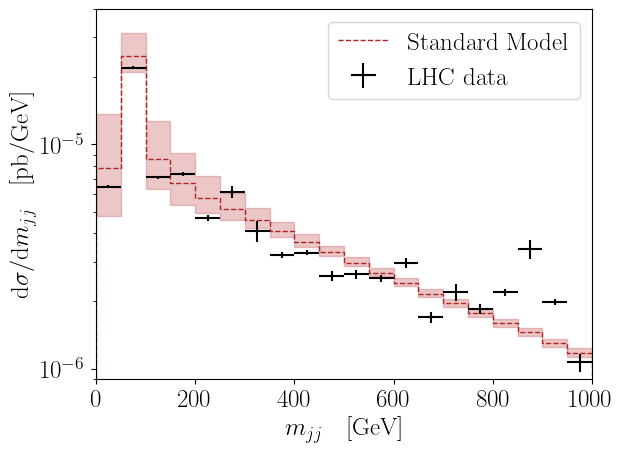

In [11]:
import matplotlib.pyplot as plt

# Tell matplotlib to use LaTeX rendering, and a large font dize
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)

# Load the data from the text files
lhc_data = np.genfromtxt("lhc-data.dat", dtype=float)
sm = np.genfromtxt("sm-prediction.dat", dtype=float)

# Calculate the centre of each bin, and the bin widths
bin_centres = np.sum(lhc_data[:,:2],axis=1)/2
bin_widths  = lhc_data[:,1] - lhc_data[:,0]

# Plot the experimental data with error bars at the centre of each bin
plt.errorbar(
    bin_centres, lhc_data[:,2],
    xerr=bin_widths/2, yerr=(lhc_data[:,3], lhc_data[:,4]),
    ls="", color="black", label="LHC data"
)

# For the stair plot, we need to manually add the 1000 GeV final
x_values_sm = np.append(sm[:,0], sm[-1,1])
y_central = sm[:,2]
y_upper = sm[:,2] + sm[:,4]
y_upper = np.append(y_upper, y_upper[-1])
y_lower = sm[:,2] - sm[:,3]
y_lower = np.append(y_lower, y_lower[-1])
                        
plt.stairs(sm[:,2], np.append(sm[:,0], sm[-1,1]),
         color="firebrick", linestyle="--", label="Standard Model")
plt.fill_between(x_values_sm, y_lower, y_upper, step="post",
                     color="firebrick", alpha=0.25)

# Alter the plot scaling and limits
plt.yscale("log")
plt.xlim(0,1000)
plt.ylim(0.9e-6, 4e-5)

# Set x,y axis labels and add the legend
plt.xlabel(r"$m_{jj}\quad \mathrm{[GeV]}$")
plt.ylabel(r"$\mathrm{d}\sigma / \mathrm{d}m_{jj}\quad \mathrm{[pb/GeV]}$")
plt.legend()

plt.show()

___

## Analysis

The data appears to show a **resonant feature** at $m_{jj}\sim 850-900 \,\mathrm{GeV}$ !

However, is this a statistically significant indication? The errors on the data are large.

___
#### Exercise 2e: Statistical analysis

Using the composite Standard Model prediction (with upper and lower bounds), determine whether the experimental data displays more than **five-sigma** tension with the theoretical SM background.

This means using the loaded histogram data for each, and comparing the **values** in the 850-900 $\mathrm{GeV}$ bin to see whether statistical fluctuation is exceedingly unlikely as an explanation of the bump in the data!

Note that in our data we have **asymmetrical** errors, i.e. different positive and negative errors. There are various ways to deal with this kind of situation, but for simplicity here we can just average them to get a single experimental and theoretical error in each bin.

(0.0, 1000.0)

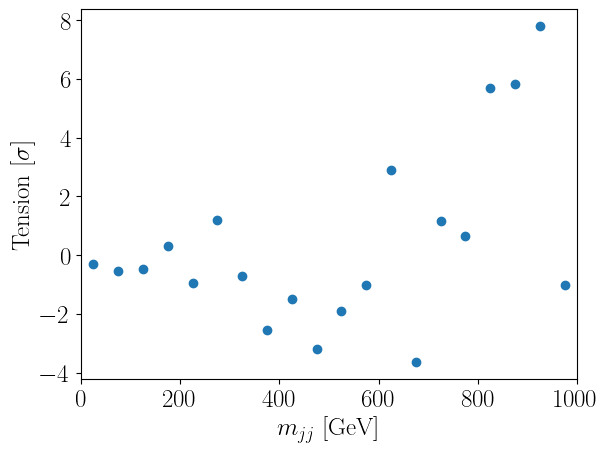

In [9]:
# Use everything you have worked with
# above to perform the required statistical
# analysis!

difference = lhc_data[:,2] - sm[:,2]

average_exp_err = (lhc_data[:,3] + lhc_data[:,4])/2
average_th_err = (sm[:,3] + sm[:,4])/2
average_total_err = np.sqrt(average_exp_err**2 + average_th_err**2)

sigmas = difference / average_total_err

plt.scatter(bin_centres, sigmas)

plt.xlabel(r"$m_{jj}$ [GeV]")
plt.ylabel(r"Tension [$\sigma$]")
plt.xlim(0,1000)

## Congratulations!
